# Check the Python version being used

In [1]:
!python --version

Python 3.7.6


# Check that the available gpu is being utilized

In [2]:
import tensorflow as tf

In [3]:
print("Num GPUs Available")
print(len(tf.config.experimental.list_physical_devices('GPU')))

Num GPUs Available
1


# Start of second method of lstm time series forecasting

In [4]:
from pandas import read_csv

df = read_csv('Time_Series_For_Clustering_El_Paso_Final.csv')

# get each separate time series as an individual list and append each of these lists to a master list

In [5]:
import re
import pandas as pd

non_decimal = re.compile(r'[^\d.]+')

list_of_training_df = []
list_of_row_components = []

for i in range(1, 524):
    
    current_row = df.iloc[i]
    
    bridge_id = current_row.iloc[0]
    
    current_row = current_row.iloc[1:]
    
    for j, row in current_row.iteritems():
        
        current_row_components = row.split(', ')
        current_row_components_replaced = []

        for idx, component in enumerate(current_row_components):

            result = non_decimal.sub('', current_row_components[idx])
            current_row_components_replaced.append(float(result))

        list_of_row_components.append(current_row_components_replaced)

# Ensure each element in the list of lists is a float

In [6]:
for idx, element in enumerate(list_of_row_components):
    for i in range(1, len(element)):
        list_of_row_components[idx][i] = float(list_of_row_components[idx][i])

# View one time series

In [7]:
for i in range(22):
    print(list_of_row_components[i])

[36.0, 97.0, 428.0, 1949.0, 2.0, 10.9, 7.3]
[36.0, 96.9, 955.0, 1949.0, 2.0, 10.9, 7.3]
[36.0, 96.9, 955.0, 1949.0, 2.0, 10.9, 7.3]
[36.0, 96.9, 955.0, 1949.0, 2.0, 10.9, 7.3]
[36.0, 96.9, 955.0, 1949.0, 2.0, 10.9, 7.3]
[36.3, 97.0, 955.0, 1949.0, 2.0, 11.0, 7.0]
[36.3, 96.9, 955.0, 1949.0, 2.0, 11.0, 7.3]
[36.3, 96.9, 983.0, 1949.0, 2.0, 11.0, 7.3]
[36.3, 96.9, 983.0, 1949.0, 2.0, 11.0, 7.3]
[36.3, 96.9, 983.0, 1949.0, 2.0, 11.0, 7.3]
[36.3, 96.9, 983.0, 1949.0, 2.0, 11.0, 7.3]
[36.3, 97.0, 422.0, 1949.0, 2.0, 11.0, 7.3]
[36.3, 97.0, 422.0, 1949.0, 2.0, 11.0, 7.3]
[36.3, 97.0, 422.0, 1949.0, 2.0, 11.0, 7.3]
[36.3, 97.0, 422.0, 1949.0, 2.0, 11.0, 7.3]
[36.3, 97.0, 422.0, 1949.0, 2.0, 9.7, 7.3]
[36.3, 97.0, 369.0, 1949.0, 2.0, 9.7, 7.3]
[36.3, 86.0, 369.0, 1949.0, 2.0, 9.7, 7.3]
[36.3, 86.0, 369.0, 1949.0, 2.0, 9.7, 7.3]
[36.3, 86.0, 369.0, 1949.0, 2.0, 9.7, 7.3]
[36.3, 86.0, 369.0, 1949.0, 2.0, 9.7, 7.3]
[36.3, 86.0, 522.0, 1949.0, 2.0, 9.7, 7.3]


# Get length of list of lists

In [8]:
len(list_of_row_components)

11506

# Swap last entry with second entry in time series to make the output predictor variable Sufficiency Rating

In [9]:
for idx, component in enumerate(list_of_row_components):
    temp = component[6]
    list_of_row_components[idx][6] = list_of_row_components[idx][1]
    list_of_row_components[idx][1] = temp

# Convert format of list to have a single time series for each index

In [10]:
import numpy as np

list_of_examples = []
temp_list = []

max_num = 22
iter = 0;

for row_component in list_of_row_components:
    if iter == max_num:
        list_of_examples.append(np.array(temp_list))
        temp_list = []
        iter = 0
        
    temp_list.append(np.array(row_component))
    iter += 1

list_of_examples = np.array(list_of_examples)

# Make the very last time step of each time series just a single value (Sufficiency Rating) for the model to predict on

In [11]:
for idx, example in enumerate(list_of_examples):
    list_of_examples[idx][21] = [list_of_examples[idx][21][6]]

# Perform train test split for dataset

In [12]:
from sklearn.model_selection import train_test_split

n_train_periods = 300
train = list_of_examples[:n_train_periods, :]
test = list_of_examples[n_train_periods:, :]

# split into input and outputs
train_X, train_y = train[:, :-1, 1:], train[:, -1, 0]
test_X, test_y = test[:, :-1, 1:], test[:, -1, 0]


In [13]:
print("Shape of train_X: " + str(train_X.shape))
print("Shape of train_y: " + str(train_y.shape))
print("Shape of test_X: " + str(test_X.shape))
print("Shape of test_y: " + str(test_y.shape))

Shape of train_X: (300, 21, 6)
Shape of train_y: (300,)
Shape of test_X: (222, 21, 6)
Shape of test_y: (222,)


# For Dense model, flatten arrays for training

In [14]:
train_X_Dense = []

for x in train_X:
    flat_list = []
    for item in x:
        for element in item:
            flat_list.append(element)
    train_X_Dense.append(flat_list)

In [15]:
train_X_Dense = np.array(train_X_Dense)

train_X_Dense.shape

(300, 126)

In [16]:
test_X_Dense = []

for x in test_X:
    flat_list = []
    for item in x:
        for element in item:
            flat_list.append(element)
    test_X_Dense.append(flat_list)

In [17]:
test_X_Dense = np.array(test_X_Dense)

test_X_Dense.shape

(222, 126)

# Build simple Dense model

In [18]:
simple_dense_model = tf.keras.models.Sequential([
    # Shape [batch, time, features] => [batch, time, lstm_units]
    tf.keras.Input(shape=(126,)),
    tf.keras.layers.Dense(units=64),
    tf.keras.layers.Dense(units=32),
    tf.keras.layers.Dense(units=16),
    tf.keras.layers.Dense(units=1)
])

# Compile model

In [19]:
simple_dense_model.compile(loss='mae', optimizer='adam')

# Train model

In [20]:
history = simple_dense_model.fit(train_X_Dense, train_y, epochs=2000, batch_size=32, validation_data=(test_X_Dense, test_y), verbose=2, shuffle=False)

Epoch 1/2000
10/10 - 0s - loss: 2567.1045 - val_loss: 3058.3132
Epoch 2/2000
10/10 - 0s - loss: 1444.0409 - val_loss: 3179.4343
Epoch 3/2000
10/10 - 0s - loss: 890.8481 - val_loss: 1186.4723
Epoch 4/2000
10/10 - 0s - loss: 739.2431 - val_loss: 1285.0183
Epoch 5/2000
10/10 - 0s - loss: 775.1707 - val_loss: 2814.6470
Epoch 6/2000
10/10 - 0s - loss: 892.0090 - val_loss: 2421.8689
Epoch 7/2000
10/10 - 0s - loss: 593.5585 - val_loss: 1101.2500
Epoch 8/2000
10/10 - 0s - loss: 756.9379 - val_loss: 2216.6262
Epoch 9/2000
10/10 - 0s - loss: 1061.0419 - val_loss: 1446.2598
Epoch 10/2000
10/10 - 0s - loss: 623.3010 - val_loss: 1488.4604
Epoch 11/2000
10/10 - 0s - loss: 549.2181 - val_loss: 1808.2914
Epoch 12/2000
10/10 - 0s - loss: 494.3852 - val_loss: 1115.1289
Epoch 13/2000
10/10 - 0s - loss: 539.1335 - val_loss: 1576.8699
Epoch 14/2000
10/10 - 0s - loss: 801.5283 - val_loss: 1041.0140
Epoch 15/2000
10/10 - 0s - loss: 397.2182 - val_loss: 2197.7034
Epoch 16/2000
10/10 - 0s - loss: 643.9857 - va

Epoch 131/2000
10/10 - 0s - loss: 39.3886 - val_loss: 154.5141
Epoch 132/2000
10/10 - 0s - loss: 32.9073 - val_loss: 96.3853
Epoch 133/2000
10/10 - 0s - loss: 22.1512 - val_loss: 105.1956
Epoch 134/2000
10/10 - 0s - loss: 32.5952 - val_loss: 161.3638
Epoch 135/2000
10/10 - 0s - loss: 33.7684 - val_loss: 95.2230
Epoch 136/2000
10/10 - 0s - loss: 37.3799 - val_loss: 102.7455
Epoch 137/2000
10/10 - 0s - loss: 46.7510 - val_loss: 64.1366
Epoch 138/2000
10/10 - 0s - loss: 34.6273 - val_loss: 109.0448
Epoch 139/2000
10/10 - 0s - loss: 26.5486 - val_loss: 91.4774
Epoch 140/2000
10/10 - 0s - loss: 27.0805 - val_loss: 118.5211
Epoch 141/2000
10/10 - 0s - loss: 34.8663 - val_loss: 105.9664
Epoch 142/2000
10/10 - 0s - loss: 36.6241 - val_loss: 76.9333
Epoch 143/2000
10/10 - 0s - loss: 33.3832 - val_loss: 98.9387
Epoch 144/2000
10/10 - 0s - loss: 32.5579 - val_loss: 84.6160
Epoch 145/2000
10/10 - 0s - loss: 32.7115 - val_loss: 91.4542
Epoch 146/2000
10/10 - 0s - loss: 27.9594 - val_loss: 63.8509
E

Epoch 263/2000
10/10 - 0s - loss: 18.8702 - val_loss: 61.8095
Epoch 264/2000
10/10 - 0s - loss: 23.5557 - val_loss: 42.6312
Epoch 265/2000
10/10 - 0s - loss: 22.8363 - val_loss: 45.5665
Epoch 266/2000
10/10 - 0s - loss: 20.2845 - val_loss: 56.7487
Epoch 267/2000
10/10 - 0s - loss: 28.5987 - val_loss: 54.2260
Epoch 268/2000
10/10 - 0s - loss: 19.9743 - val_loss: 80.3217
Epoch 269/2000
10/10 - 0s - loss: 27.4486 - val_loss: 109.7009
Epoch 270/2000
10/10 - 0s - loss: 23.8511 - val_loss: 110.0844
Epoch 271/2000
10/10 - 0s - loss: 26.7974 - val_loss: 116.8946
Epoch 272/2000
10/10 - 0s - loss: 28.4816 - val_loss: 59.1267
Epoch 273/2000
10/10 - 0s - loss: 23.2194 - val_loss: 49.8193
Epoch 274/2000
10/10 - 0s - loss: 24.4043 - val_loss: 35.1981
Epoch 275/2000
10/10 - 0s - loss: 20.5137 - val_loss: 61.5378
Epoch 276/2000
10/10 - 0s - loss: 22.7571 - val_loss: 49.9277
Epoch 277/2000
10/10 - 0s - loss: 18.4315 - val_loss: 43.2808
Epoch 278/2000
10/10 - 0s - loss: 23.3956 - val_loss: 27.8941
Epoch

Epoch 396/2000
10/10 - 0s - loss: 20.1035 - val_loss: 45.5833
Epoch 397/2000
10/10 - 0s - loss: 19.9630 - val_loss: 40.0162
Epoch 398/2000
10/10 - 0s - loss: 20.0987 - val_loss: 21.4711
Epoch 399/2000
10/10 - 0s - loss: 18.8486 - val_loss: 38.7661
Epoch 400/2000
10/10 - 0s - loss: 14.5050 - val_loss: 36.9602
Epoch 401/2000
10/10 - 0s - loss: 16.5386 - val_loss: 44.8779
Epoch 402/2000
10/10 - 0s - loss: 14.5983 - val_loss: 76.0460
Epoch 403/2000
10/10 - 0s - loss: 14.5763 - val_loss: 52.3092
Epoch 404/2000
10/10 - 0s - loss: 14.4626 - val_loss: 72.5998
Epoch 405/2000
10/10 - 0s - loss: 13.3824 - val_loss: 32.9210
Epoch 406/2000
10/10 - 0s - loss: 15.1753 - val_loss: 45.8189
Epoch 407/2000
10/10 - 0s - loss: 19.1050 - val_loss: 35.4996
Epoch 408/2000
10/10 - 0s - loss: 14.6405 - val_loss: 32.6975
Epoch 409/2000
10/10 - 0s - loss: 17.2295 - val_loss: 41.9144
Epoch 410/2000
10/10 - 0s - loss: 15.8739 - val_loss: 54.9519
Epoch 411/2000
10/10 - 0s - loss: 19.6594 - val_loss: 37.2938
Epoch 41

Epoch 528/2000
10/10 - 0s - loss: 35.2883 - val_loss: 73.4123
Epoch 529/2000
10/10 - 0s - loss: 23.8554 - val_loss: 69.9211
Epoch 530/2000
10/10 - 0s - loss: 26.2877 - val_loss: 39.0896
Epoch 531/2000
10/10 - 0s - loss: 18.4676 - val_loss: 33.4925
Epoch 532/2000
10/10 - 0s - loss: 17.9467 - val_loss: 34.1098
Epoch 533/2000
10/10 - 0s - loss: 16.8722 - val_loss: 58.3773
Epoch 534/2000
10/10 - 0s - loss: 13.0711 - val_loss: 52.3682
Epoch 535/2000
10/10 - 0s - loss: 17.6417 - val_loss: 28.9756
Epoch 536/2000
10/10 - 0s - loss: 13.1573 - val_loss: 34.4506
Epoch 537/2000
10/10 - 0s - loss: 19.7951 - val_loss: 77.0492
Epoch 538/2000
10/10 - 0s - loss: 19.2014 - val_loss: 35.6529
Epoch 539/2000
10/10 - 0s - loss: 22.5721 - val_loss: 32.1812
Epoch 540/2000
10/10 - 0s - loss: 19.4146 - val_loss: 32.8609
Epoch 541/2000
10/10 - 0s - loss: 14.4022 - val_loss: 57.0347
Epoch 542/2000
10/10 - 0s - loss: 14.9716 - val_loss: 42.2563
Epoch 543/2000
10/10 - 0s - loss: 20.9473 - val_loss: 36.4110
Epoch 54

Epoch 661/2000
10/10 - 0s - loss: 17.3100 - val_loss: 43.7281
Epoch 662/2000
10/10 - 0s - loss: 12.7096 - val_loss: 29.1572
Epoch 663/2000
10/10 - 0s - loss: 21.2783 - val_loss: 83.2034
Epoch 664/2000
10/10 - 0s - loss: 19.0722 - val_loss: 50.9160
Epoch 665/2000
10/10 - 0s - loss: 24.0623 - val_loss: 55.5053
Epoch 666/2000
10/10 - 0s - loss: 21.6159 - val_loss: 33.9826
Epoch 667/2000
10/10 - 0s - loss: 13.1290 - val_loss: 59.8105
Epoch 668/2000
10/10 - 0s - loss: 13.4422 - val_loss: 20.0961
Epoch 669/2000
10/10 - 0s - loss: 18.3379 - val_loss: 51.2836
Epoch 670/2000
10/10 - 0s - loss: 14.7188 - val_loss: 39.8551
Epoch 671/2000
10/10 - 0s - loss: 24.2668 - val_loss: 38.5726
Epoch 672/2000
10/10 - 0s - loss: 24.1417 - val_loss: 58.6711
Epoch 673/2000
10/10 - 0s - loss: 28.1217 - val_loss: 64.9119
Epoch 674/2000
10/10 - 0s - loss: 52.3592 - val_loss: 71.5572
Epoch 675/2000
10/10 - 0s - loss: 59.9523 - val_loss: 148.1793
Epoch 676/2000
10/10 - 0s - loss: 51.1746 - val_loss: 160.9109
Epoch 

Epoch 794/2000
10/10 - 0s - loss: 17.9589 - val_loss: 130.2837
Epoch 795/2000
10/10 - 0s - loss: 27.2516 - val_loss: 60.3796
Epoch 796/2000
10/10 - 0s - loss: 34.9264 - val_loss: 67.0131
Epoch 797/2000
10/10 - 0s - loss: 22.9485 - val_loss: 46.9782
Epoch 798/2000
10/10 - 0s - loss: 13.8389 - val_loss: 60.0621
Epoch 799/2000
10/10 - 0s - loss: 27.7709 - val_loss: 87.3839
Epoch 800/2000
10/10 - 0s - loss: 26.3573 - val_loss: 61.8384
Epoch 801/2000
10/10 - 0s - loss: 17.2992 - val_loss: 38.0349
Epoch 802/2000
10/10 - 0s - loss: 8.3932 - val_loss: 25.6475
Epoch 803/2000
10/10 - 0s - loss: 19.6627 - val_loss: 35.6131
Epoch 804/2000
10/10 - 0s - loss: 17.1800 - val_loss: 33.2202
Epoch 805/2000
10/10 - 0s - loss: 20.1346 - val_loss: 66.7470
Epoch 806/2000
10/10 - 0s - loss: 22.3885 - val_loss: 42.9067
Epoch 807/2000
10/10 - 0s - loss: 22.1772 - val_loss: 48.7324
Epoch 808/2000
10/10 - 0s - loss: 12.9307 - val_loss: 60.8115
Epoch 809/2000
10/10 - 0s - loss: 13.1613 - val_loss: 91.9286
Epoch 81

Epoch 927/2000
10/10 - 0s - loss: 27.5701 - val_loss: 136.8097
Epoch 928/2000
10/10 - 0s - loss: 31.7041 - val_loss: 71.1428
Epoch 929/2000
10/10 - 0s - loss: 18.0571 - val_loss: 42.0959
Epoch 930/2000
10/10 - 0s - loss: 18.2206 - val_loss: 38.3461
Epoch 931/2000
10/10 - 0s - loss: 13.1075 - val_loss: 67.5546
Epoch 932/2000
10/10 - 0s - loss: 17.9041 - val_loss: 42.4262
Epoch 933/2000
10/10 - 0s - loss: 22.1041 - val_loss: 91.3889
Epoch 934/2000
10/10 - 0s - loss: 25.1752 - val_loss: 41.0209
Epoch 935/2000
10/10 - 0s - loss: 34.8105 - val_loss: 65.6211
Epoch 936/2000
10/10 - 0s - loss: 22.4143 - val_loss: 57.6020
Epoch 937/2000
10/10 - 0s - loss: 20.3128 - val_loss: 60.1023
Epoch 938/2000
10/10 - 0s - loss: 28.4704 - val_loss: 22.7926
Epoch 939/2000
10/10 - 0s - loss: 15.9546 - val_loss: 33.3602
Epoch 940/2000
10/10 - 0s - loss: 22.9565 - val_loss: 72.4597
Epoch 941/2000
10/10 - 0s - loss: 20.1220 - val_loss: 26.7427
Epoch 942/2000
10/10 - 0s - loss: 23.4030 - val_loss: 35.3638
Epoch 9

Epoch 1059/2000
10/10 - 0s - loss: 14.4645 - val_loss: 33.3817
Epoch 1060/2000
10/10 - 0s - loss: 8.3976 - val_loss: 19.7294
Epoch 1061/2000
10/10 - 0s - loss: 6.6256 - val_loss: 17.1762
Epoch 1062/2000
10/10 - 0s - loss: 6.5541 - val_loss: 18.1881
Epoch 1063/2000
10/10 - 0s - loss: 10.4215 - val_loss: 26.2102
Epoch 1064/2000
10/10 - 0s - loss: 8.2309 - val_loss: 18.7157
Epoch 1065/2000
10/10 - 0s - loss: 9.7211 - val_loss: 16.9074
Epoch 1066/2000
10/10 - 0s - loss: 9.5511 - val_loss: 39.2564
Epoch 1067/2000
10/10 - 0s - loss: 13.5978 - val_loss: 34.7366
Epoch 1068/2000
10/10 - 0s - loss: 12.6287 - val_loss: 45.6022
Epoch 1069/2000
10/10 - 0s - loss: 13.6094 - val_loss: 29.9907
Epoch 1070/2000
10/10 - 0s - loss: 10.3405 - val_loss: 21.6096
Epoch 1071/2000
10/10 - 0s - loss: 16.7549 - val_loss: 20.7543
Epoch 1072/2000
10/10 - 0s - loss: 8.7357 - val_loss: 13.7158
Epoch 1073/2000
10/10 - 0s - loss: 8.6639 - val_loss: 31.0988
Epoch 1074/2000
10/10 - 0s - loss: 8.3902 - val_loss: 20.8856
E

Epoch 1190/2000
10/10 - 0s - loss: 14.2280 - val_loss: 11.5312
Epoch 1191/2000
10/10 - 0s - loss: 11.3668 - val_loss: 26.5267
Epoch 1192/2000
10/10 - 0s - loss: 7.5150 - val_loss: 14.4007
Epoch 1193/2000
10/10 - 0s - loss: 9.0447 - val_loss: 29.9201
Epoch 1194/2000
10/10 - 0s - loss: 8.9241 - val_loss: 14.0533
Epoch 1195/2000
10/10 - 0s - loss: 9.3263 - val_loss: 23.3302
Epoch 1196/2000
10/10 - 0s - loss: 7.5487 - val_loss: 18.2004
Epoch 1197/2000
10/10 - 0s - loss: 8.7324 - val_loss: 25.3562
Epoch 1198/2000
10/10 - 0s - loss: 8.5758 - val_loss: 24.4410
Epoch 1199/2000
10/10 - 0s - loss: 14.9131 - val_loss: 20.5318
Epoch 1200/2000
10/10 - 0s - loss: 8.5570 - val_loss: 21.7632
Epoch 1201/2000
10/10 - 0s - loss: 9.4186 - val_loss: 31.3600
Epoch 1202/2000
10/10 - 0s - loss: 10.1316 - val_loss: 18.2356
Epoch 1203/2000
10/10 - 0s - loss: 11.4292 - val_loss: 20.2797
Epoch 1204/2000
10/10 - 0s - loss: 12.8282 - val_loss: 22.2317
Epoch 1205/2000
10/10 - 0s - loss: 9.8953 - val_loss: 32.0093
Ep

Epoch 1322/2000
10/10 - 0s - loss: 9.8563 - val_loss: 11.8344
Epoch 1323/2000
10/10 - 0s - loss: 8.5495 - val_loss: 15.7980
Epoch 1324/2000
10/10 - 0s - loss: 10.2578 - val_loss: 19.2453
Epoch 1325/2000
10/10 - 0s - loss: 9.0233 - val_loss: 27.1275
Epoch 1326/2000
10/10 - 0s - loss: 14.7545 - val_loss: 14.2013
Epoch 1327/2000
10/10 - 0s - loss: 13.3113 - val_loss: 20.3775
Epoch 1328/2000
10/10 - 0s - loss: 9.0034 - val_loss: 23.4131
Epoch 1329/2000
10/10 - 0s - loss: 8.4018 - val_loss: 16.6255
Epoch 1330/2000
10/10 - 0s - loss: 10.5985 - val_loss: 18.0972
Epoch 1331/2000
10/10 - 0s - loss: 10.0091 - val_loss: 25.0018
Epoch 1332/2000
10/10 - 0s - loss: 10.7820 - val_loss: 12.3587
Epoch 1333/2000
10/10 - 0s - loss: 10.7913 - val_loss: 28.4047
Epoch 1334/2000
10/10 - 0s - loss: 8.8075 - val_loss: 27.0490
Epoch 1335/2000
10/10 - 0s - loss: 10.2275 - val_loss: 27.1880
Epoch 1336/2000
10/10 - 0s - loss: 9.9998 - val_loss: 18.8169
Epoch 1337/2000
10/10 - 0s - loss: 8.6412 - val_loss: 33.9349


Epoch 1454/2000
10/10 - 0s - loss: 16.0156 - val_loss: 21.7191
Epoch 1455/2000
10/10 - 0s - loss: 12.6599 - val_loss: 41.5752
Epoch 1456/2000
10/10 - 0s - loss: 12.5278 - val_loss: 24.5917
Epoch 1457/2000
10/10 - 0s - loss: 8.0262 - val_loss: 22.1997
Epoch 1458/2000
10/10 - 0s - loss: 14.1263 - val_loss: 34.8687
Epoch 1459/2000
10/10 - 0s - loss: 12.4492 - val_loss: 38.6162
Epoch 1460/2000
10/10 - 0s - loss: 14.5721 - val_loss: 26.3060
Epoch 1461/2000
10/10 - 0s - loss: 11.8576 - val_loss: 13.6217
Epoch 1462/2000
10/10 - 0s - loss: 12.1557 - val_loss: 40.4102
Epoch 1463/2000
10/10 - 0s - loss: 10.1883 - val_loss: 17.7246
Epoch 1464/2000
10/10 - 0s - loss: 9.4783 - val_loss: 26.1745
Epoch 1465/2000
10/10 - 0s - loss: 10.8421 - val_loss: 29.4468
Epoch 1466/2000
10/10 - 0s - loss: 12.5414 - val_loss: 21.7876
Epoch 1467/2000
10/10 - 0s - loss: 12.2222 - val_loss: 49.1077
Epoch 1468/2000
10/10 - 0s - loss: 11.3367 - val_loss: 25.3369
Epoch 1469/2000
10/10 - 0s - loss: 13.1925 - val_loss: 26

Epoch 1586/2000
10/10 - 0s - loss: 9.3266 - val_loss: 13.2077
Epoch 1587/2000
10/10 - 0s - loss: 9.3644 - val_loss: 26.8662
Epoch 1588/2000
10/10 - 0s - loss: 11.0484 - val_loss: 17.7204
Epoch 1589/2000
10/10 - 0s - loss: 6.5698 - val_loss: 26.2096
Epoch 1590/2000
10/10 - 0s - loss: 10.6475 - val_loss: 16.4464
Epoch 1591/2000
10/10 - 0s - loss: 14.8209 - val_loss: 10.8199
Epoch 1592/2000
10/10 - 0s - loss: 9.1595 - val_loss: 16.7499
Epoch 1593/2000
10/10 - 0s - loss: 9.8315 - val_loss: 33.8040
Epoch 1594/2000
10/10 - 0s - loss: 9.7652 - val_loss: 17.2272
Epoch 1595/2000
10/10 - 0s - loss: 8.6128 - val_loss: 26.0746
Epoch 1596/2000
10/10 - 0s - loss: 9.5077 - val_loss: 36.7525
Epoch 1597/2000
10/10 - 0s - loss: 13.1073 - val_loss: 16.4089
Epoch 1598/2000
10/10 - 0s - loss: 8.3777 - val_loss: 21.6147
Epoch 1599/2000
10/10 - 0s - loss: 12.2151 - val_loss: 18.8752
Epoch 1600/2000
10/10 - 0s - loss: 10.8045 - val_loss: 18.0150
Epoch 1601/2000
10/10 - 0s - loss: 7.8329 - val_loss: 15.8400
Ep

Epoch 1718/2000
10/10 - 0s - loss: 10.8606 - val_loss: 22.3831
Epoch 1719/2000
10/10 - 0s - loss: 7.2125 - val_loss: 14.8672
Epoch 1720/2000
10/10 - 0s - loss: 5.3766 - val_loss: 14.0052
Epoch 1721/2000
10/10 - 0s - loss: 5.9004 - val_loss: 15.4757
Epoch 1722/2000
10/10 - 0s - loss: 6.6059 - val_loss: 11.5340
Epoch 1723/2000
10/10 - 0s - loss: 6.5495 - val_loss: 9.2993
Epoch 1724/2000
10/10 - 0s - loss: 5.0620 - val_loss: 9.3735
Epoch 1725/2000
10/10 - 0s - loss: 5.0053 - val_loss: 16.6023
Epoch 1726/2000
10/10 - 0s - loss: 10.0866 - val_loss: 15.8185
Epoch 1727/2000
10/10 - 0s - loss: 6.9242 - val_loss: 12.8926
Epoch 1728/2000
10/10 - 0s - loss: 8.2544 - val_loss: 12.2696
Epoch 1729/2000
10/10 - 0s - loss: 9.6160 - val_loss: 16.5526
Epoch 1730/2000
10/10 - 0s - loss: 6.6881 - val_loss: 14.6891
Epoch 1731/2000
10/10 - 0s - loss: 5.7518 - val_loss: 13.3905
Epoch 1732/2000
10/10 - 0s - loss: 5.3804 - val_loss: 15.1005
Epoch 1733/2000
10/10 - 0s - loss: 9.5807 - val_loss: 10.9917
Epoch 17

Epoch 1850/2000
10/10 - 0s - loss: 4.8395 - val_loss: 14.0208
Epoch 1851/2000
10/10 - 0s - loss: 8.4439 - val_loss: 14.8725
Epoch 1852/2000
10/10 - 0s - loss: 4.6672 - val_loss: 11.1557
Epoch 1853/2000
10/10 - 0s - loss: 4.9731 - val_loss: 8.4206
Epoch 1854/2000
10/10 - 0s - loss: 7.8236 - val_loss: 14.3552
Epoch 1855/2000
10/10 - 0s - loss: 6.6847 - val_loss: 12.9118
Epoch 1856/2000
10/10 - 0s - loss: 8.0611 - val_loss: 17.7397
Epoch 1857/2000
10/10 - 0s - loss: 8.0830 - val_loss: 12.4959
Epoch 1858/2000
10/10 - 0s - loss: 9.1013 - val_loss: 11.8709
Epoch 1859/2000
10/10 - 0s - loss: 8.7937 - val_loss: 14.0202
Epoch 1860/2000
10/10 - 0s - loss: 6.0060 - val_loss: 14.3874
Epoch 1861/2000
10/10 - 0s - loss: 6.4187 - val_loss: 8.7253
Epoch 1862/2000
10/10 - 0s - loss: 6.5838 - val_loss: 11.8863
Epoch 1863/2000
10/10 - 0s - loss: 8.3493 - val_loss: 14.3260
Epoch 1864/2000
10/10 - 0s - loss: 8.8097 - val_loss: 14.4031
Epoch 1865/2000
10/10 - 0s - loss: 5.2440 - val_loss: 9.4884
Epoch 1866/

Epoch 1983/2000
10/10 - 0s - loss: 4.8408 - val_loss: 11.9901
Epoch 1984/2000
10/10 - 0s - loss: 6.2792 - val_loss: 11.3190
Epoch 1985/2000
10/10 - 0s - loss: 8.6867 - val_loss: 12.6785
Epoch 1986/2000
10/10 - 0s - loss: 6.2673 - val_loss: 15.1148
Epoch 1987/2000
10/10 - 0s - loss: 4.5985 - val_loss: 14.6601
Epoch 1988/2000
10/10 - 0s - loss: 6.9187 - val_loss: 14.8497
Epoch 1989/2000
10/10 - 0s - loss: 6.3343 - val_loss: 10.6503
Epoch 1990/2000
10/10 - 0s - loss: 5.8857 - val_loss: 14.7953
Epoch 1991/2000
10/10 - 0s - loss: 6.9575 - val_loss: 18.9705
Epoch 1992/2000
10/10 - 0s - loss: 10.2177 - val_loss: 12.1032
Epoch 1993/2000
10/10 - 0s - loss: 8.0515 - val_loss: 16.3078
Epoch 1994/2000
10/10 - 0s - loss: 6.3914 - val_loss: 13.0982
Epoch 1995/2000
10/10 - 0s - loss: 6.1919 - val_loss: 12.3094
Epoch 1996/2000
10/10 - 0s - loss: 7.9067 - val_loss: 11.1021
Epoch 1997/2000
10/10 - 0s - loss: 6.5541 - val_loss: 17.2098
Epoch 1998/2000
10/10 - 0s - loss: 9.8828 - val_loss: 11.6027
Epoch 1

# Plot model loss and validation loss

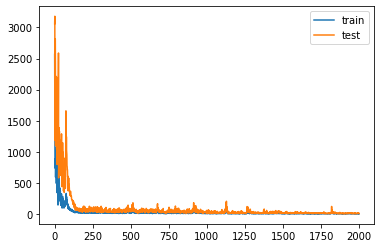

In [21]:
from matplotlib import pyplot

pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

# Make predictions based on test set and get a root mean squared error 

In [22]:
from sklearn.metrics import mean_squared_error
import math

yhat = simple_dense_model.predict(test_X_Dense)
mse = mean_squared_error(test_y, yhat)
rmse = math.sqrt(mse)

In [23]:
rmse

19.39398471232248